# A hands-on tutorial on NumPy

### Task 1: Let's add a few numbers

Creating an array/list in vanilla Python

In [1]:
num_list = list(range(5000))

In [2]:
num_list[:5]

[0, 1, 2, 3, 4]

#### C like indexing

In [3]:
len_list = len(num_list)
sum_list = 0
for i in range(len_list):
    sum_list+= num_list[i]

#### Let's make it a function

In [4]:
def c_like_sum(l):
    len_list = len(num_list)
    sum_list = 0
    for i in range(len_list):
        sum_list+= num_list[i]
    return sum_list


In [5]:
c_like = %timeit c_like_sum(num_list)

376 µs ± 22.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
c_like

#### Pythonic iteration to find sum

In [7]:
def python_like_sum(l):
    sum_list = 0
    for x in l:
        sum_list+= x
    return sum_list

In [8]:
%timeit python_like_sum(num_list)

207 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Well, just use `sum`

In [9]:
%timeit sum(num_list)

38.8 µs ± 1.94 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
import numpy as np

In [11]:
y = np.array(num_list)

### What does a numpy array look like?

In [12]:
y

array([   0,    1,    2, ..., 4997, 4998, 4999])

In [13]:
%timeit np.sum(y)

4.74 µs ± 30.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Some attributes of numpy arrays

In [14]:
type(y)

numpy.ndarray

In [15]:
len(y)

5000

In [16]:
y.shape

(5000,)

In [17]:
y.size

5000

In [18]:
y.dtype

dtype('int64')

In [19]:
y

array([   0,    1,    2, ..., 4997, 4998, 4999])

In [20]:
y_32 = np.array(num_list, dtype='int32')
y_32

array([   0,    1,    2, ..., 4997, 4998, 4999], dtype=int32)

In [21]:
y_32_as_type = y.astype('int32')
y_32_as_type

array([   0,    1,    2, ..., 4997, 4998, 4999], dtype=int32)

### Comparing two numpy arrays

#### Plain check for equals?

In [22]:
y_32_as_type == y_32

array([ True,  True,  True, ...,  True,  True,  True])

This tells us if all the values in the arrays are the same. But, we need a single answer!

In [23]:
(y_32_as_type == y_32).astype('int')

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
np.sum((y_32_as_type == y_32).astype('int'))==y_32.size

True

#### use in-built checker!

In [25]:
np.array_equal(y_32, y_32_as_type)

True

### Find sum of first `n` numbers

In [26]:
n = 10
y.cumsum()[n]

55

What does `cumsum` do?

In [27]:
np.array([0, 1, 2, 4]).cumsum()

array([0, 1, 3, 7])

### Exercise 1: Find n! using numpy in a single line of code

#### Hint: Similar to `cumsum`, there is a `cumprod` function

In [28]:
y[1:].cumprod()[:n]

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

### Exercise 2: Given the starting number, the ratio and the length of a sequence, use cumprod to generate a Geometric Progression

In [29]:
a = 3
r = 2
np.array([a]+[r]*(n-1)).cumprod()

array([   3,    6,   12,   24,   48,   96,  192,  384,  768, 1536])

## Initialisation 

In [30]:
np.zeros(100)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
np.ones(100)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [32]:
np.ones(100).dtype

dtype('float64')

### Exercise 3: Initialise an array of ones of length 100 with int16 datatype

In [33]:
np.ones(100, dtype='int')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Initialising multi dimensional arrays

In [34]:
multi_dim_ones = np.ones((5,2))
multi_dim_ones

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

#### Let us re-run some of the previous attributes for a numpy array

In [35]:
multi_dim_ones.shape

(5, 2)

In [36]:
multi_dim_ones.size

10

#### Initialising empty array

In [37]:
np.empty((10, 2))

array([[0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 3.73610348e-061],
       [1.28822975e-231, 1.28822975e-231],
       [4.94065646e-323, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000]])

But, this is not empty! What is empty and why is it different from `np.zero`?

From the documentation

    
 >Array of uninitialized (arbitrary) data of the given shape, dtype, and
    order.  Object arrays will be initialized to None.

#### Let's compare the relative speed of initialisation!

In [38]:
%timeit np.zeros((1000, 1000))

281 µs ± 3.37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
%timeit np.empty((1000, 1000))

1.79 µs ± 269 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Initialising `np.empty` is way quicker! This is due to the fact that we do not have to set the values to be zeros!

#### Initialising using `ones_like`

In [40]:
np.ones_like((y))

array([1, 1, 1, ..., 1, 1, 1])

In [41]:
#### Initialising using evenly spaced numbers over a range

In [42]:
np.linspace(0, 10, 11, dtype=int)
# start, stop, number of elements

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

#### Initialising similar to `range` for Python lists

In [43]:
np.arange(0, 11, 1, dtype=int)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### Exercise 4: Using both linspace and arange, create a numpy array of all numbers till 30 divisble by 3

In [44]:
np.linspace(3, 30, (30//3), dtype=int)

array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30])

In [45]:
np.arange(3, 33, 3)

array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30])

### Reshaping!

In [46]:
a = np.array([[1, 3], [4, 5]])
a

array([[1, 3],
       [4, 5]])

In [47]:
a.shape

(2, 2)

In [48]:
a.reshape(4, 1)

array([[1],
       [3],
       [4],
       [5]])

### Exercise 5: Using reshape, generate the array 
      [[1],
       [4],
       [3],
       [5]]
    



In [49]:
a.reshape(4, 1, order='F')

array([[1],
       [4],
       [3],
       [5]])

In [50]:
a.T.reshape(4, 1)

array([[1],
       [4],
       [3],
       [5]])

### Exercise 6: Write five numbers in each row

In [51]:
np.linspace(1, 100, 100, dtype=int).reshape(20, 5)

array([[  1,   2,   3,   4,   5],
       [  6,   7,   8,   9,  10],
       [ 11,  12,  13,  14,  15],
       [ 16,  17,  18,  19,  20],
       [ 21,  22,  23,  24,  25],
       [ 26,  27,  28,  29,  30],
       [ 31,  32,  33,  34,  35],
       [ 36,  37,  38,  39,  40],
       [ 41,  42,  43,  44,  45],
       [ 46,  47,  48,  49,  50],
       [ 51,  52,  53,  54,  55],
       [ 56,  57,  58,  59,  60],
       [ 61,  62,  63,  64,  65],
       [ 66,  67,  68,  69,  70],
       [ 71,  72,  73,  74,  75],
       [ 76,  77,  78,  79,  80],
       [ 81,  82,  83,  84,  85],
       [ 86,  87,  88,  89,  90],
       [ 91,  92,  93,  94,  95],
       [ 96,  97,  98,  99, 100]])

#### Without using the `20` in the reshape

In [52]:
np.linspace(1, 100, 100, dtype=int).reshape(-1, 5)

array([[  1,   2,   3,   4,   5],
       [  6,   7,   8,   9,  10],
       [ 11,  12,  13,  14,  15],
       [ 16,  17,  18,  19,  20],
       [ 21,  22,  23,  24,  25],
       [ 26,  27,  28,  29,  30],
       [ 31,  32,  33,  34,  35],
       [ 36,  37,  38,  39,  40],
       [ 41,  42,  43,  44,  45],
       [ 46,  47,  48,  49,  50],
       [ 51,  52,  53,  54,  55],
       [ 56,  57,  58,  59,  60],
       [ 61,  62,  63,  64,  65],
       [ 66,  67,  68,  69,  70],
       [ 71,  72,  73,  74,  75],
       [ 76,  77,  78,  79,  80],
       [ 81,  82,  83,  84,  85],
       [ 86,  87,  88,  89,  90],
       [ 91,  92,  93,  94,  95],
       [ 96,  97,  98,  99, 100]])

### Exercise 7

Reshape the array to 5, 4, 5

In [53]:
np.linspace(1, 100, 100, dtype=int).reshape(5,4,5)

array([[[  1,   2,   3,   4,   5],
        [  6,   7,   8,   9,  10],
        [ 11,  12,  13,  14,  15],
        [ 16,  17,  18,  19,  20]],

       [[ 21,  22,  23,  24,  25],
        [ 26,  27,  28,  29,  30],
        [ 31,  32,  33,  34,  35],
        [ 36,  37,  38,  39,  40]],

       [[ 41,  42,  43,  44,  45],
        [ 46,  47,  48,  49,  50],
        [ 51,  52,  53,  54,  55],
        [ 56,  57,  58,  59,  60]],

       [[ 61,  62,  63,  64,  65],
        [ 66,  67,  68,  69,  70],
        [ 71,  72,  73,  74,  75],
        [ 76,  77,  78,  79,  80]],

       [[ 81,  82,  83,  84,  85],
        [ 86,  87,  88,  89,  90],
        [ 91,  92,  93,  94,  95],
        [ 96,  97,  98,  99, 100]]])

## Arithmetic operations

### Adding two vectors

In [54]:
y1 = y.copy()


In [55]:
y1

array([   0,    1,    2, ..., 4997, 4998, 4999])

In [56]:
y1+y

array([   0,    2,    4, ..., 9994, 9996, 9998])

In [57]:
y1.shape==y.shape

True

In [58]:
ones_a = np.ones((2,2))
ones_b = np.ones((2,2))

In [59]:
ones_a+ones_b

array([[2., 2.],
       [2., 2.]])

In [60]:
np.add(ones_a, ones_b)

array([[2., 2.],
       [2., 2.]])

### Exercise 8: Find the additive inverse of an array 

>x + add_inv(x) = O

In [61]:
def additive_inverse(x):
    zeroes = np.zeros_like(x)
    return zeroes - x

In [62]:
additive_inverse((np.ones((3, 3))))

array([[-1., -1., -1.],
       [-1., -1., -1.],
       [-1., -1., -1.]])

### Elementwise mutiplication

In [63]:
a1 = np.array([[3, 4], [5, 1]])
a2 = np.array(([4, 3], [5, 7]))

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'A1')

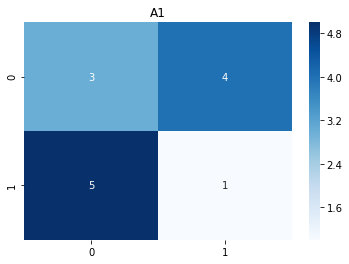

In [65]:
sns.heatmap(a1, annot=True, cmap='Blues')
plt.title("A1")

Text(0.5,1,'A2')

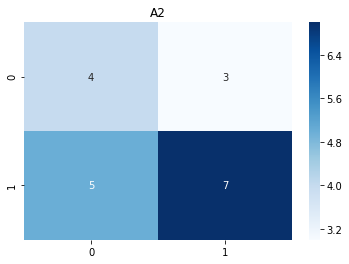

In [66]:
sns.heatmap(a2, annot=True, cmap='Blues')
plt.title("A2")

In [67]:
a1_elem_mul_a2 = np.multiply(a1, a2)

In [68]:
a1_elem_mul_a2

array([[12, 12],
       [25,  7]])

Text(0.5,1,'A1 Element Wise Multiplication with A2')

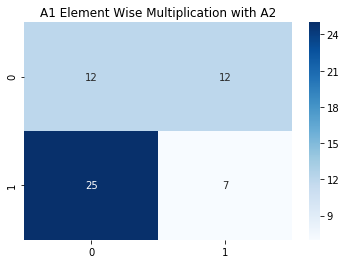

In [69]:
sns.heatmap(a1_elem_mul_a2, annot=True, cmap='Blues')
plt.title("A1 Element Wise Multiplication with A2")

#### Square root

Text(0.5,1,'SQRT(A1)')

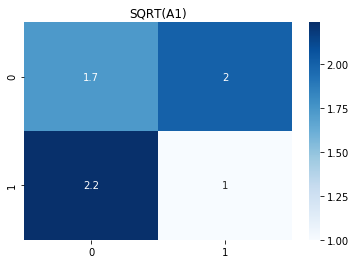

In [70]:
sns.heatmap(np.sqrt(a1), annot=True, cmap='Blues')
plt.title("SQRT(A1)")

#### Find $n^{th}$ number in fibonacci sequence using matrix math

![](https://www.geeksforgeeks.org/wp-content/uploads/fibonaccimatrix.png)

#### Use numpy matrix

In [71]:
base_matrix = np.matrix([[1, 1], [1,0]])
base_matrix

matrix([[1, 1],
        [1, 0]])

In [72]:
n = 10
nth_power = base_matrix **n

In [73]:
nth_power

matrix([[89, 55],
        [55, 34]])

In [74]:
fib_n = nth_power[1, 0]
fib_n

55

### Broadcasting

In [75]:
one_d = np.arange(1, 10, 1)
one_d

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Add 1 elementwise to each number in the array

In [76]:
np.add(one_d, np.ones_like(one_d))

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

#### Let's do something different!

In [77]:
one_d + 1

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [78]:
np.tile(1, one_d.shape)

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [79]:
one_d*2

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [80]:
(one_d*2)+2

array([ 4,  6,  8, 10, 12, 14, 16, 18, 20])

In [81]:
two_d = np.arange(1, 11, 1).reshape(-1, 2)
two_d

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [82]:
two_d + 1

array([[ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [83]:
two_d + np.array([1, 2])

array([[ 2,  4],
       [ 4,  6],
       [ 6,  8],
       [ 8, 10],
       [10, 12]])

In [84]:
# Works with list too!
two_d + np.array([1, 2])

array([[ 2,  4],
       [ 4,  6],
       [ 6,  8],
       [ 8, 10],
       [10, 12]])

In [85]:
two_d + np.array([[1], [1], [1], [1], [1]])

array([[ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

### Exercise 9: Find the mean of each row of a matrix and subtract the mean from the corresponding row

In [86]:
two_d = np.array([[1,2,3],[4,5,6],[7,8,9],[1,4,9]])
two_d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 4, 9]])

In [87]:
two_d - np.mean(two_d, axis = 1).reshape(-1,1)

array([[-1.        ,  0.        ,  1.        ],
       [-1.        ,  0.        ,  1.        ],
       [-1.        ,  0.        ,  1.        ],
       [-3.66666667, -0.66666667,  4.33333333]])

### Exercise 10: Find the softmax of an array.
If x is the array and p is its softmax, then
$ p_i =\frac{e^{(x_i)}}{\sum_{t=1}^{n}e^{(x_t)}} $

In [88]:
x = np.array([1,2,3,4,5,6,7,8])
x

array([1, 2, 3, 4, 5, 6, 7, 8])

In [89]:
np.exp(x) / np.sum(np.exp(x))

array([5.76612770e-04, 1.56739601e-03, 4.26062410e-03, 1.15815771e-02,
       3.14819905e-02, 8.55769227e-02, 2.32622194e-01, 6.32332683e-01])

### Indexing

In [90]:
test_array = np.arange(1, 11, 1).reshape(5, 2)
test_array

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

#### Syntax

arr[outer selector, inner selector, ...]

#### Get a row

In [91]:

test_array[0, :]

array([1, 2])

#### Exercise : Print the last column

In [92]:
test_array[:, 1]

array([ 2,  4,  6,  8, 10])

We knew that there are 2 columns and thus we used the index [:, 1]. Could we use some other way?

In [93]:
test_array[:, -1]

array([ 2,  4,  6,  8, 10])

#### Exercise find the element in last row and last column

In [94]:
test_array[-1, -1]

10

#### Exercise: Find the first two rows and first column

In [95]:
test_array[:2, 0]

array([1, 3])

Wait, this is a lower rank array. What if we want the same rank array?

In [96]:
test_array[:2, 0:1]

array([[1],
       [3]])

### Simple condition checking and indexing

In [97]:
test_array%4==0

array([[False, False],
       [False,  True],
       [False, False],
       [False,  True],
       [False, False]])

In [98]:
test_array[test_array%4==0]

array([4, 8])

#### Exercise: Print all numbers greater than 5

In [99]:
test_array[test_array>5]

array([ 6,  7,  8,  9, 10])

### Indexing and assignment

#### Set the last column to be all 1s

In [100]:
test_array[:, 1] = 1
test_array

array([[1, 1],
       [3, 1],
       [5, 1],
       [7, 1],
       [9, 1]])

#### Exercise: Set the first column of last two rows to be all -1

In [101]:
test_array[-2:, 0] = -1
test_array

array([[ 1,  1],
       [ 3,  1],
       [ 5,  1],
       [-1,  1],
       [-1,  1]])

#### Exercise: Set all negative numbers to 0

In [102]:
test_array[test_array<0] = 0
test_array

array([[1, 1],
       [3, 1],
       [5, 1],
       [0, 1],
       [0, 1]])

### Interfacing with files - Persistence and Loading

#### Saving data to disk in binary format

In [103]:
np.save('test-arr.npy', test_array)

In [104]:
!ls -lah test-arr.npy

-rw-r--r--  1 nipun  staff   208B Oct 27 15:01 test-arr.npy


In [105]:
!cat test-arr.npy

�NUMPY v {'descr': '<i8', 'fortran_order': False, 'shape': (5, 2), }                                                          
                                                                        

#### Loading binary data from disk

In [106]:
test_loaded = np.load('test-arr.npy')

In [107]:
test_loaded

array([[1, 1],
       [3, 1],
       [5, 1],
       [0, 1],
       [0, 1]])

In [108]:
np.array_equal(test_loaded, test_array)

True

#### Saving data to disk in text format

In [109]:
big_array = np.random.random_integers(1, 100, size=(10,10))
big_array

/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  """Entry point for launching an IPython kernel.


array([[ 17,  26,  43,  25,  44,  65,   4,  94,  61,  42],
       [ 12,  58,  56,  13,  18,  13,  66,  15,  13,  48],
       [  6,  65,  59,   6,  13,  80,   8,   7,  98,   8],
       [ 63,  92,  47,  24,  10,   8,  50, 100,  76,  79],
       [ 23,  89,  35,  16,   6,  35,  48,  26,  62,  56],
       [ 45,  84,  37,  66,   5,  45,  40,  55,   9,  54],
       [ 22,  38,  50,  15,  76,  46,  13,  48,  41,  38],
       [ 60,  34,  44,  61,  28,  19,  98,  72,  40,  84],
       [ 90,  48,  97,  13,  21,  34,  59,  17,  91,  55],
       [ 18,  55,   6,  22,  74,  10,  74,  42,  71,  23]])

In [110]:
np.savetxt('big-array.csv', big_array, delimiter=',', fmt='%d')

In [111]:
!head big-array.csv

17,26,43,25,44,65,4,94,61,42
12,58,56,13,18,13,66,15,13,48
6,65,59,6,13,80,8,7,98,8
63,92,47,24,10,8,50,100,76,79
23,89,35,16,6,35,48,26,62,56
45,84,37,66,5,45,40,55,9,54
22,38,50,15,76,46,13,48,41,38
60,34,44,61,28,19,98,72,40,84
90,48,97,13,21,34,59,17,91,55
18,55,6,22,74,10,74,42,71,23


#### Loading text data from disk

In [112]:
np.loadtxt('big-array.csv', delimiter=',')

array([[ 17.,  26.,  43.,  25.,  44.,  65.,   4.,  94.,  61.,  42.],
       [ 12.,  58.,  56.,  13.,  18.,  13.,  66.,  15.,  13.,  48.],
       [  6.,  65.,  59.,   6.,  13.,  80.,   8.,   7.,  98.,   8.],
       [ 63.,  92.,  47.,  24.,  10.,   8.,  50., 100.,  76.,  79.],
       [ 23.,  89.,  35.,  16.,   6.,  35.,  48.,  26.,  62.,  56.],
       [ 45.,  84.,  37.,  66.,   5.,  45.,  40.,  55.,   9.,  54.],
       [ 22.,  38.,  50.,  15.,  76.,  46.,  13.,  48.,  41.,  38.],
       [ 60.,  34.,  44.,  61.,  28.,  19.,  98.,  72.,  40.,  84.],
       [ 90.,  48.,  97.,  13.,  21.,  34.,  59.,  17.,  91.,  55.],
       [ 18.,  55.,   6.,  22.,  74.,  10.,  74.,  42.,  71.,  23.]])

### Miscellaneous exercises


1. Swap two rows of a 2-d array.
2. Given two vectors (1-d arrays), find the projection of the first vector on the second.
3. Given n arrays, create a matrix where each array is a column of the matrix.
4. Given a system of equations (say 3 variable, 3 equation system), solve it.
   Hint: Use the numpy.linalg sub-module. It contains an inverse function.

##### The linalg sub-module is a very useful module which has linear algebra functions.